# AlignedUMAP

In [1]:
import numpy as np
import sklearn.datasets
import umap
import umap.plot
import umap.utils as utils
import umap.aligned_umap
import matplotlib.pyplot as plt

In [2]:
digits = sklearn.datasets.load_digits()

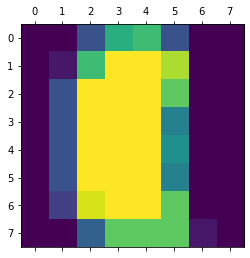

In [3]:
ordered_digits = digits.data[np.argsort(digits.data.sum(axis=1))]
ordered_target = digits.target[np.argsort(digits.data.sum(axis=1))]
plt.matshow(ordered_digits[-1].reshape((8,8)))

In [6]:
slices = [ordered_digits[150 * i:min(ordered_digits.shape[0], 150 * i + 400)] for i in range(10)]

In [10]:
relation_dict = {i+150:i for i in range(400-150)}
relation_dicts = [relation_dict.copy() for i in range(len(slices) - 1)]

In [13]:
aligned_mapper = umap.AlignedUMAP().fit(slices, relations=relation_dicts)

In [14]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

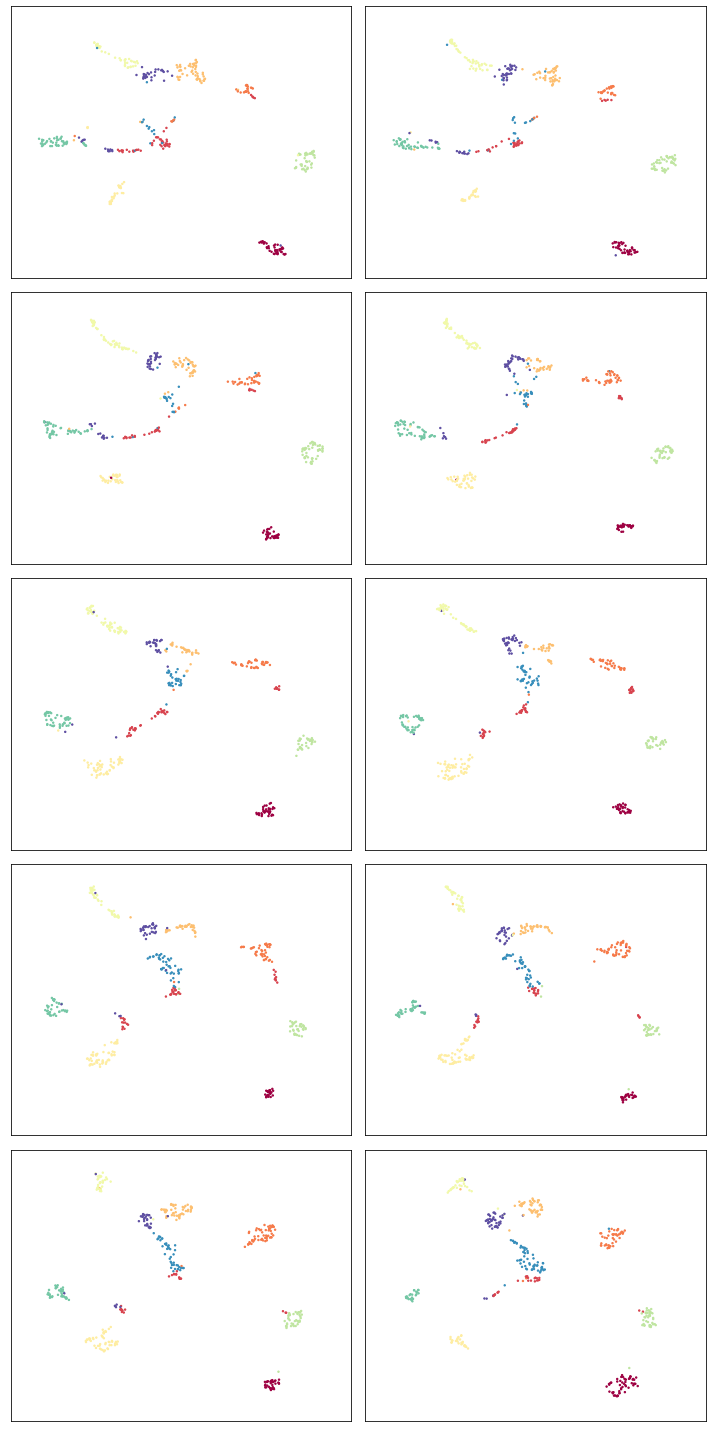

In [15]:
fig, axs = plt.subplots(5,2, figsize=(10, 20))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()

# Online updating of aligned embeddings

In [17]:
%%time
updating_mapper = umap.AlignedUMAP().fit(slices[:2], relations=relation_dicts[:1])

CPU times: user 7.02 s, sys: 65.4 ms, total: 7.09 s
Wall time: 7.17 s


In [18]:
for i in range(2,len(slices)):
    %time updating_mapper.update(slices[i], relations={v:k for k,v in relation_dicts[i-1].items()})

/Users/mosheborochov/opt/anaconda3/lib/python3.8/site-packages/umap/aligned_umap.py:188: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.
  if i in relation_dict:


CPU times: user 5.34 s, sys: 47.2 ms, total: 5.39 s
Wall time: 5.43 s
CPU times: user 4.5 s, sys: 36.5 ms, total: 4.54 s
Wall time: 4.57 s
CPU times: user 4.29 s, sys: 21.9 ms, total: 4.31 s
Wall time: 4.32 s
CPU times: user 4.71 s, sys: 36.3 ms, total: 4.75 s
Wall time: 4.79 s
CPU times: user 4.55 s, sys: 25.6 ms, total: 4.58 s
Wall time: 4.6 s
CPU times: user 4.78 s, sys: 40.2 ms, total: 4.82 s
Wall time: 4.86 s
CPU times: user 4.58 s, sys: 24.7 ms, total: 4.6 s
Wall time: 4.63 s
CPU times: user 4.09 s, sys: 13.8 ms, total: 4.1 s
Wall time: 4.1 s


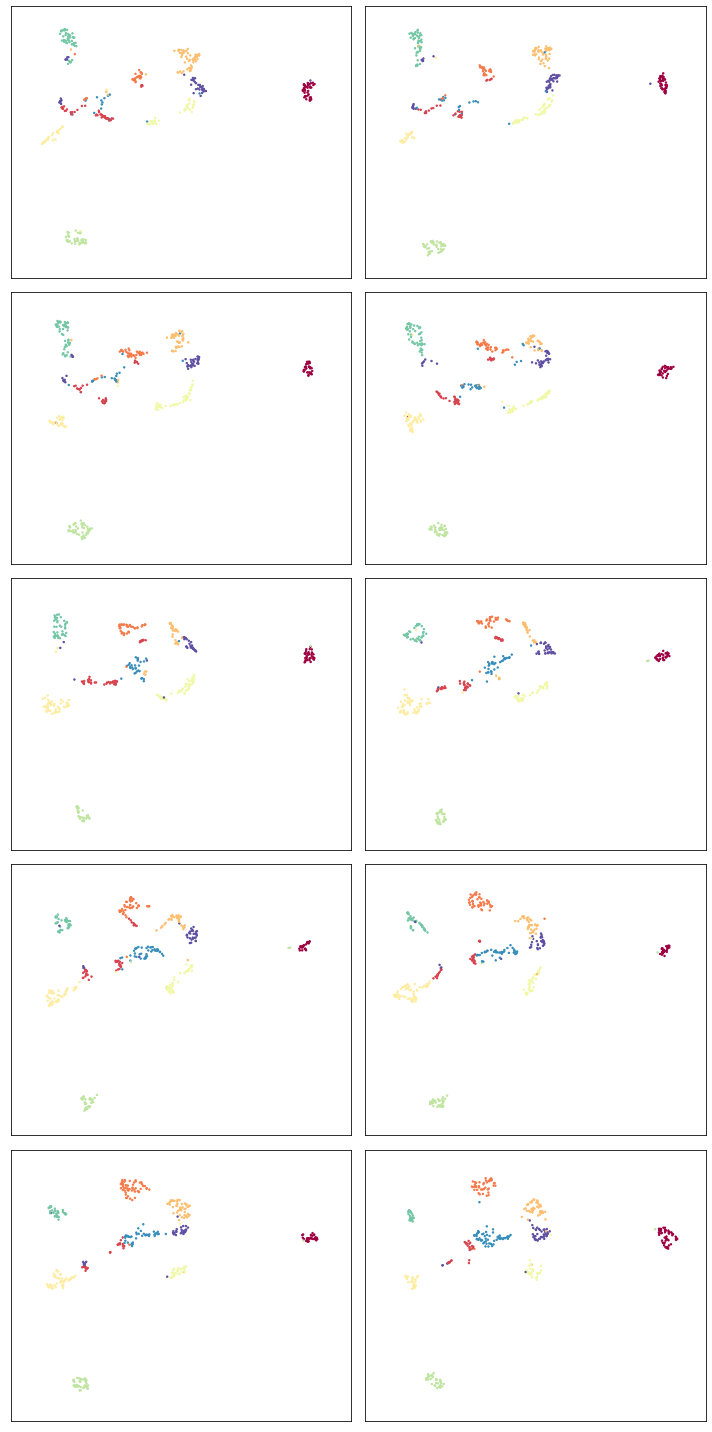

In [19]:
fig, axs = plt.subplots(5,2, figsize=(10, 20))
ax_bound = axis_bounds(np.vstack(updating_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    ax.scatter(*updating_mapper.embeddings_[i].T, s=2, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()